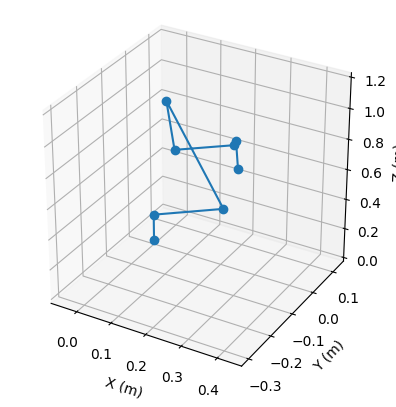

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rotation matrices
def rot_x(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[1, 0,  0],
                     [0, c, -s],
                     [0, s,  c]])

def rot_y(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[ c, 0, s],
                     [ 0, 1, 0],
                     [-s, 0, c]])

def rot_z(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s, 0],
                     [s,  c, 0],
                     [0,  0, 1]])

def transform(R, t):
    """Create a 4x4 homogeneous transform from rotation R and translation t."""
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = t
    return T

# Given joint angles
q = [2.2015, -1.7744, 1.1871, -2.0474, -1.5897, 2.0208]

# Fixed 90° rotation about local y (from MJCF quats "1 0 1 0")
R_y_90 = rot_y(np.pi / 2)

# Build transforms
T = np.eye(4)
positions = [T[:3, 3]]  # base origin

# Base fixed rotation (quat "0 0 0 -1": 180° about z)
T = T @ transform(rot_z(np.pi), [0, 0, 0])

# 1. Shoulder link
T = T @ transform(np.eye(3), [0, 0, 0.181])
positions.append(T[:3, 3])

# Joint 1: shoulder_pan
T = T @ transform(rot_z(q[0]), [0, 0, 0])

# 2. Upper arm link (fixed rot + translation)
T = T @ transform(R_y_90, [0, 0.176, 0])
positions.append(T[:3, 3])

# Joint 2: shoulder_lift
T = T @ transform(rot_y(q[1]), [0, 0, 0])

# 3. Forearm link
T = T @ transform(np.eye(3), [0, -0.137, 0.613])
positions.append(T[:3, 3])

# Joint 3: elbow
T = T @ transform(rot_y(q[2]), [0, 0, 0])

# 4. Wrist 1 link (fixed rot + translation)
T = T @ transform(R_y_90, [0, 0, 0.571])
positions.append(T[:3, 3])

# Joint 4: wrist_1
T = T @ transform(rot_y(q[3]), [0, 0, 0])

# 5. Wrist 2 link
T = T @ transform(np.eye(3), [0, 0.135, 0])
positions.append(T[:3, 3])

# Joint 5: wrist_2 (about z)
T = T @ transform(rot_z(q[4]), [0, 0, 0])

# 6. Wrist 3 link
T = T @ transform(np.eye(3), [0, 0, 0.12])
positions.append(T[:3, 3])

# Joint 6: wrist_3
T = T @ transform(rot_y(q[5]), [0, 0, 0])

# End-effector attachment site
T = T @ transform(np.eye(3), [0, 0.1, 0])
positions.append(T[:3, 3])

# Convert positions to array for plotting
positions = np.array(positions)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], '-o')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_box_aspect([1, 1, 1])
plt.show()
